In [7]:
import pandas as pd
import dowhy
from dowhy import CausalModel
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = pd.read_csv('/workspaces/UnderWater-Decision/data/synthetic_dataset.csv')
le = LabelEncoder()
data['platform'] = le.fit_transform(data['platform'])
data['item'] = le.fit_transform(data['item'])
data['Recommended_Cleaning_Method'] = le.fit_transform(data['Recommended_Cleaning_Method'])

# Define the model's variables
treatment = 'depth'  # or any other variable
outcome = 'method'
common_causes = ['year', 'structure_type', 'biofouling_type', 'biofouling_extent']

causal_graph = """
digraph {
    depthmin -> hardPerc;
    depthmin -> softPerc;
    depthmax -> hardPerc;
    depthmax -> softPerc;
    year -> hardPerc;
    year -> softPerc;
    item -> hardPerc;
    item -> softPerc;
    hardPerc -> Total_Area_Coverage;
    softPerc -> Total_Area_Coverage;
    hardmm -> hardPerc;
    softmm -> softPerc;
    Total_Area_Coverage -> Recommended_Cleaning_Method;
}
"""

model = CausalModel(
    data=data,
    treatment=['depthmin', 'depthmax', 'year', 'item', 'hardmm', 'softmm'],
    outcome='Recommended_Cleaning_Method',
    graph=causal_graph.replace("\n", " ")
)


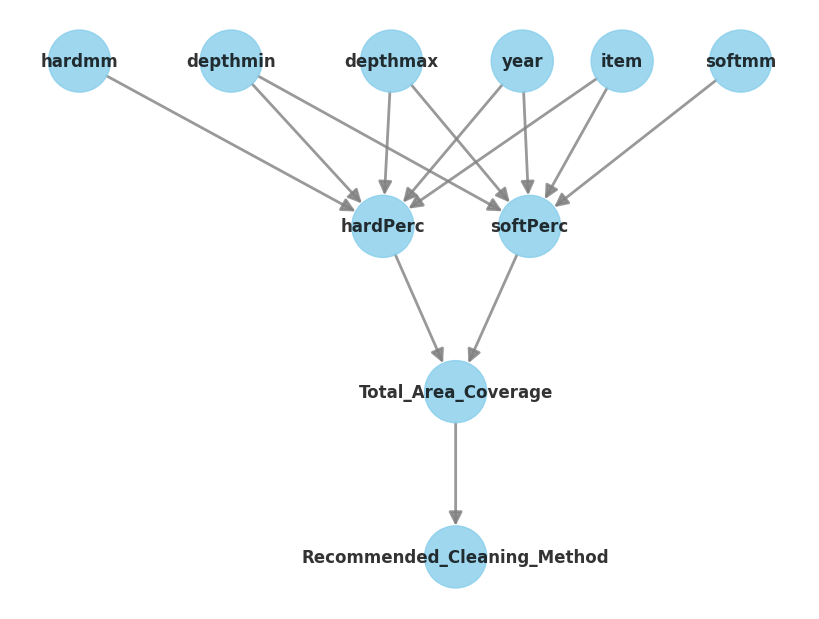

In [8]:
model.view_model()

In [9]:
# Identify the causal effect
identified_estimand = model.identify_effect()

In [10]:
# Choose a method to estimate the causal effect (e.g., linear regression, propensity score matching)
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

/opt/miniconda/envs/uw-decision/lib/python3.10/site-packages/dowhy/causal_estimators/regression_estimator.py:128: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [12]:
print(estimate)


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
                        d                                                     
─────────────────────────────────────────────────(E[Recommended_Cleaning_Metho
d[depthmin  depthmax  year  item  hardmm  softmm]                             

   
d])
   
Estimand assumption 1, Unconfoundedness: If U→{depthmin,depthmax,year,item,hardmm,softmm} and U→Recommended_Cleaning_Method then P(Recommended_Cleaning_Method|depthmin,depthmax,year,item,hardmm,softmm,,U) = P(Recommended_Cleaning_Method|depthmin,depthmax,year,item,hardmm,softmm,)

## Realized estimand
b: Recommended_Cleaning_Method~depthmin+depthmax+year+item+hardmm+softmm
Target units: ate

## Estimate
Mean value: 0.005511120806572123



In [13]:
# Refute the estimate
refutation = model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(refutation)

/opt/miniconda/envs/uw-decision/lib/python3.10/site-packages/dowhy/causal_estimators/regression_estimator.py:128: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/opt/miniconda/envs/uw-decision/lib/python3.10/site-packages/dowhy/causal_estimators/regression_estimator.py:128: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/opt/miniconda/envs/uw-decision/lib/python3.10/site-packages/dowhy/causal_estimators/regression_estimator.py:128: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer

Refute: Add a random common cause
Estimated effect:0.005511120806572123
New effect:0.005511185624129564
p value:1.0



/opt/miniconda/envs/uw-decision/lib/python3.10/site-packages/dowhy/causal_estimators/regression_estimator.py:128: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [14]:
# Example: Changing the 'treatment_variable' to a specific value
counterfactual_data = data.copy()
counterfactual_data['treatment_variable'] = 'new_value'  # Change 'new_value' to your counterfactual value


In [15]:
# First, identify the estimand
identified_estimand = model.identify_effect()

# Then, estimate the causal effect
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)

# Now, apply the counterfactual
counterfactuals = model.counterfactuals(
    data=counterfactual_data,
    estimand=identified_estimand,
    method_name="backdoor.linear_regression"
)


/opt/miniconda/envs/uw-decision/lib/python3.10/site-packages/dowhy/causal_estimators/regression_estimator.py:128: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


AttributeError: 'CausalModel' object has no attribute 'counterfactuals'

In [16]:
from dowhy import gcm

# Initialize the Structural Causal Model (SCM)
causal_model = gcm.StructuralCausalModel(causal_graph)

In [18]:
# Automatic assignment
gcm.auto.assign_causal_mechanisms(causal_model, data)

# Manual assignment (example for a single node)
causal_model.set_causal_mechanism('depthmin', gcm.EmpiricalDistribution())
# Repeat this step for each node in your graph


AttributeError: 'str' object has no attribute 'nodes'